In [1]:
%run ../../../common_functions/import_all.py

import time
from common_functions.setup_notebook import set_css_style, setup_matplotlib, config_ipython

config_ipython()
setup_matplotlib()
set_css_style()

# Sorting algorithms

We will illustrate how different sorting algorithms work, using a sample array.

In [6]:
# we will use the sample array

array = [6, 5, 3, 1, 8, 7, 2, 4]

## Mergesort

Note that this implementation, which is recursive, is inspired by [[1]](#mergesort-so).

In [7]:
def mergesort(my_array):

    if len(my_array) == 1:
        return my_array

    new = []
    n = len(my_array)
    midpoint = int(n/2)

    right = mergesort(my_array[:midpoint])
    left = mergesort(my_array[midpoint:])

    while len(right) > 0 and len(left) > 0:
            if right[0] > left[0]:
                new.append(left[0])
                left.pop(0)
            else:
                new.append(right[0])
                right.pop(0)
     
    new += right + left
        
    return new

mergesort(array)

[1, 2, 3, 4, 5, 6, 7, 8]

## Bubble sort

An implementation which is also recursive.

In [8]:
def bubblesort(my_array):
    
    my_array_copy = my_array.copy()
    n = len(my_array_copy)
    
    if (all([my_array_copy[i] < my_array_copy[i+1] for i in range(n-1)])):
        return my_array_copy
        
    for i in range(n-1):
        if my_array_copy[i] > my_array_copy[i + 1]:
            my_array_copy[i], my_array_copy[i+1] = my_array_copy[i+1], my_array_copy[i]
   
    my_array_copy = bubblesort(my_array_copy)

    return my_array_copy

bubblesort(array)

[1, 2, 3, 4, 5, 6, 7, 8]

## Insertion sort

In [9]:
def insertionsort(my_array):
    
    my_array_copy = my_array.copy()
    n = len(my_array_copy)
    
    for i in range(1, n):
        for j in range(i):
            if my_array_copy[i] < my_array_copy[j]:
                my_array_copy[i], my_array_copy[j] = my_array_copy[j], my_array_copy[i]
                
    return my_array_copy

insertionsort(array)

[1, 2, 3, 4, 5, 6, 7, 8]

## Quicksort

This code here is admittedly awful (quite imperative). Also note that unlike the previous ones, this method is modifying the original array so to not lose the original order it is better to pass a copy.

In [10]:
def quicksort(my_array, pivot_index, end_index):
            
    my_array_slice = my_array[pivot_index: end_index]
        
    if len(my_array_slice) <= 1:
        return
    
    pivot = my_array[pivot_index]
                
    l, r = pivot_index + 1, end_index - 1

    while l <= r - 1:
                
        i = r
        while i > pivot_index:
            if my_array[i] < pivot:
                break
            i -= 1
        r = i
                
        i = l
        while i < end_index:
            if my_array[i] >= pivot:
                break
            i += 1
        l = i

        if l <= r:
            my_array[l], my_array[r] = my_array[r], my_array[l]
        
    if l < r:
        my_array[l], my_array[pivot_index] = my_array[pivot_index], my_array[l]
    elif l == r:
        if my_array[l] < my_array[pivot_index]:
            my_array[l], my_array[pivot_index] = my_array[pivot_index], my_array[l]
    else:
        my_array[r], my_array[pivot_index] = my_array[pivot_index], my_array[r]

    new_pivot_index = my_array.index(pivot)
    my_array_slice = my_array[pivot_index: end_index]
    
    right = my_array_slice[pivot_index: new_pivot_index]
    left = my_array_slice[my_array_slice.index(pivot) + 1:]
    
    quicksort(my_array, 0, len(right))
    quicksort(my_array, new_pivot_index + 1, new_pivot_index + 1 + len(left))
            
    return

array_copy = array.copy()
array_copy = [7, 1, 3, 8, 2, 0]
('original array', array_copy)
quicksort(array_copy, 0, len(array_copy))
array_copy

('original array', [7, 1, 3, 8, 2, 0])

[0, 1, 2, 3, 7, 8]

## What does Python use

The `sort` and `sorted` built-in methods in Python use a very efficient algorithm called Timsort [[5]](#timsort), designed by Tim Peters specifically for use in Python itself in 2002. 

## Measurement time (!)

Let's measure the time taken by the implementations we wrote above, and by timsort, on arrays of different length. Note that we wanted to use bubblesort as well but our implementation easily exceeds recursion limits! So we will use mergesort, insertion sort and timsort. 

From the plot below you can see both the quadratic trend of insertion sort, and the fact that timsort is the most efficient one. Note that our implementation of mergesort includes some calls to `.pop`, which may add some overhead.

### Now let's run these

Going to run all these codes on arrays of various lengths, scaling as powers of ten, and measuring the time taken. Note that the implementations above may add some unneeded overhead give the way they've been written so the results here shouldn't be taken at face value. 

In [11]:
mergesort_t = []
bubblesort_t = []
insertionsort_t = []
quicksort_t = []
timsort_t = []

#n_range = [10, 100, 1000, 10000]
n_range = np.arange(1, 1000, 100)

for n in n_range:
    
    an_array = random.sample(range(n), n)
    
    t = time.process_time()
    sorted_array = mergesort(an_array)
    mergesort_t.append(time.process_time() - t)
    
    t = time.process_time()
    sorted_array = bubblesort(an_array)
    bubblesort_t.append(time.process_time() - t)
    
    t = time.process_time()
    sorted_array = insertionsort(an_array)
    insertionsort_t.append(time.process_time() - t)
    
    t = time.process_time()
    sorted_array = quicksort(an_array.copy(), 0, len(an_array))
    quicksort_t.append(time.process_time() - t)
    
    t = time.process_time()
    sorted_array = sorted(an_array)
    timsort_t.append(time.process_time() - t)

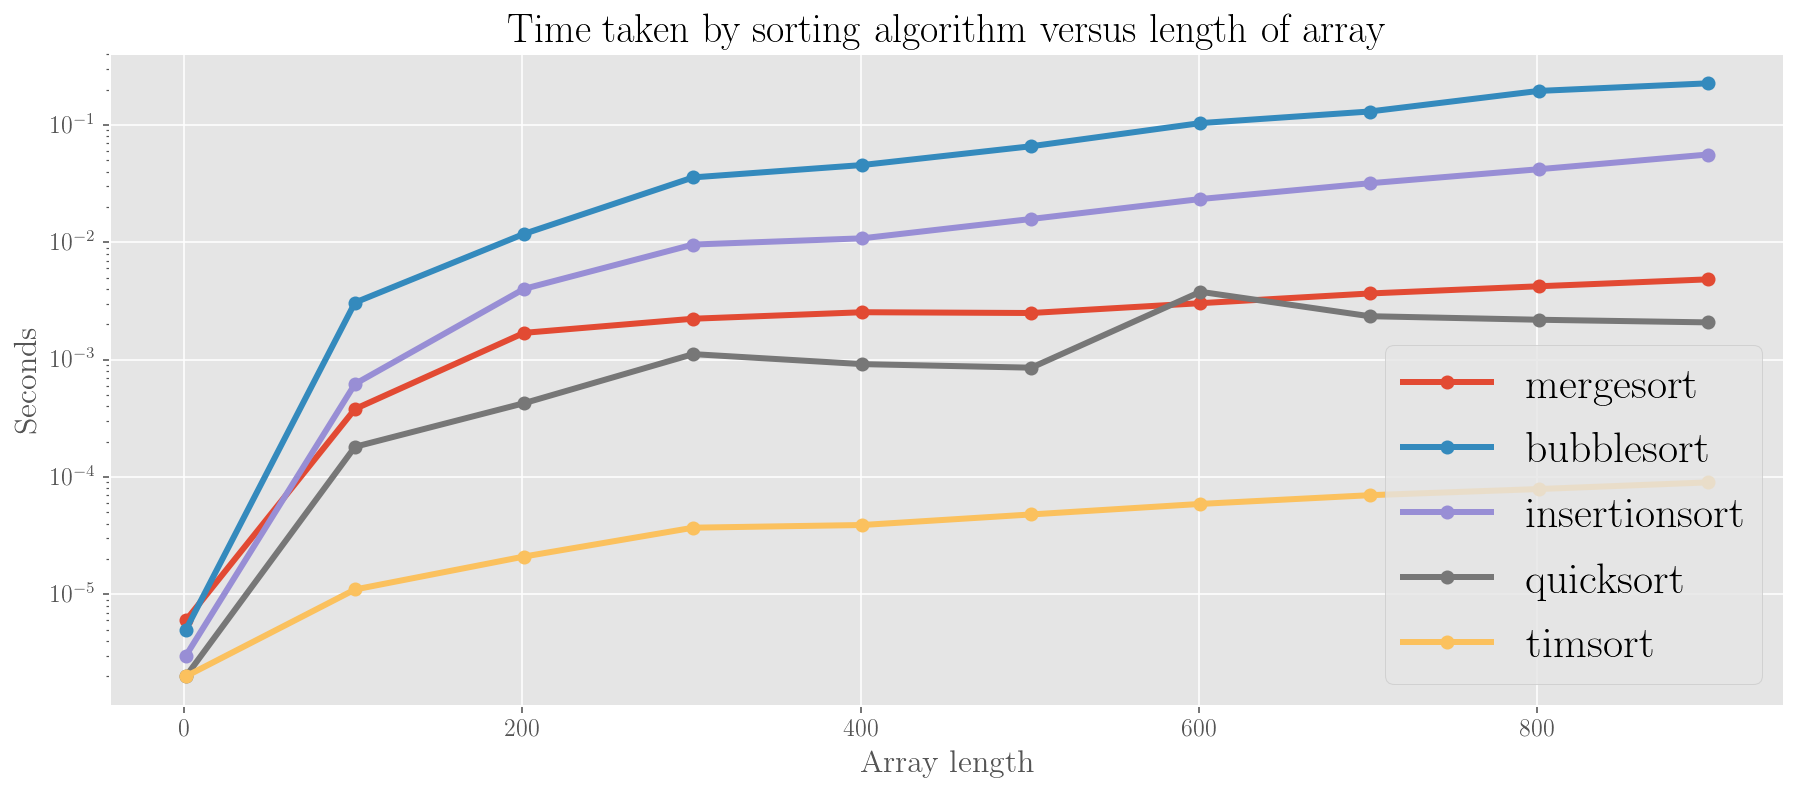

In [12]:
plt.figure(figsize=(15,6))

plt.semilogy(n_range, mergesort_t, marker='o', label='mergesort')
plt.plot(n_range, bubblesort_t, marker='o', label='bubblesort')

plt.plot(n_range, insertionsort_t, marker='o', label='insertionsort')
plt.plot(n_range, quicksort_t, marker='o', label='quicksort')
plt.plot(n_range, timsort_t, marker='o', label='timsort')

plt.legend()
plt.title('Time taken by sorting algorithm versus length of array')
plt.xlabel('Array length')
plt.ylabel('Seconds')
plt.savefig('sorting.png', dpi=200)
plt.show();